In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt

Here we simulate a drunk undergoing a random walk as they voyages home where their steps have unequal probabilities in each direction. What the drunk does not realize is that they are starting their walk at their front door. Will they realize and ever get home? 

This script simulates a 1D random walk given k, where $0 < k < 1$ equals the probability of stepping one unit away from the origin and $1 − k$ is the probability of stepping one unit towards the origin. We assume the origin as the start point. 

In [2]:
#Single random Walk for one Drunk 
#N = number of steps
def randomWalk(N,k):
    
    #Generate array of random variables
    r = np.random.rand(N-1, 1)
    
    #probability to move left or right inputted by the user
    prob = k
    
    #probability to walk left or right from origin is equal
    probfirststep = 0.5
    
    #initialize array to store steps steps
    positions = np.zeros(N)
    
    #define our origin
    origin = 0
    
    positions[0] = origin
    
    #for N steps, decide based on probability to left or right
    for i in range(1,N):
        if i == 1:
            if r[0][0] > probfirststep: 
                 origin = origin -  1
            elif r[0][0] < probfirststep:
                    origin = origin + 1
        else:
            if (r[i-1][0] > prob) & (positions[i-1] > 0): 
                origin = origin -  1
            if (r[i-1][0] < prob) & (positions[i-1] > 0):
                origin = origin + 1
                
            if (r[i-1][0] > prob) & (positions[i-1] < 0): 
                origin = origin +  1
            if (r[i-1][0] < prob) & (positions[i-1] < 0):
                origin = origin - 1
            
            #If drunk is at origin, step away from origin
            #Sadly the drunk will never get home
            if (r[i-1][0] > probfirststep) & (positions[i-1] == 0): 
                origin = origin +  1
            if (r[i-1][0] < probfirststep) & (positions[i-1] == 0):
                origin = origin - 1
                
        positions[i] = origin   
        
    return positions

If we would like to watch SimN drunks walking around, we iterate through our random walks and can plot their trajectories. We also can find where all of the drunks end their walk and rest for the night. 

In [5]:
#Creates histogram and plots all values for SimN drunken walks
def randomWalkSim(N,k,SimN):
    
    #store final positions
    finalPositions=np.zeros(SimN)
    
    #plot all random walks
    for i in range(1,SimN):
        
        plt.title('Drunken Random Walk for k probability and N steps SimN times')
        plt.xlabel('Position')
        plt.ylabel('Time')
        
        x=randomWalk(N,k)
        t= np.linspace(0, N,N)
        plt.plot(x,t)
        finalPositions[i-1]=x[N-1]
        
    print ('k=',k,'N=',N,'SimN=',SimN )    
    plt.show()  
    
    #Histogram of final positions  
    print ('k=',k,'N=',N,'SimN=',SimN ) 
    
    plt.title('Number of Times Each Location is Reached')
    plt.xlabel('Final position')
    plt.ylabel('Frequency')
    plt.hist(finalPositions, bins=100)
    plt.show()
    
    return finalPositions

('k=', 0.25, 'N=', 100, 'SimN=', 5000)


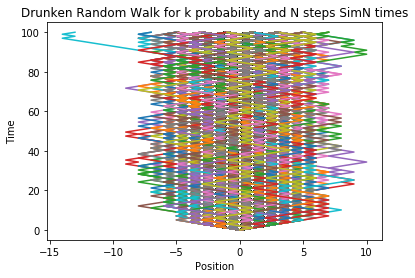

('k=', 0.25, 'N=', 100, 'SimN=', 5000)


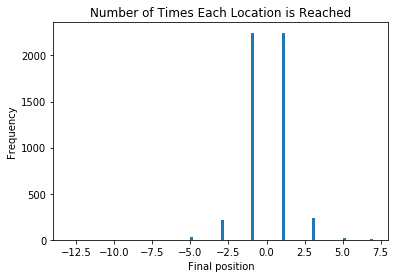

In [6]:
a = randomWalkSim(100,.25,5000)

('k=', 0.5, 'N=', 100, 'SimN=', 5000)


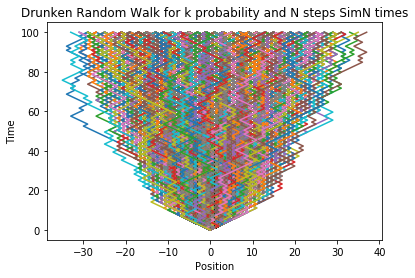

('k=', 0.5, 'N=', 100, 'SimN=', 5000)


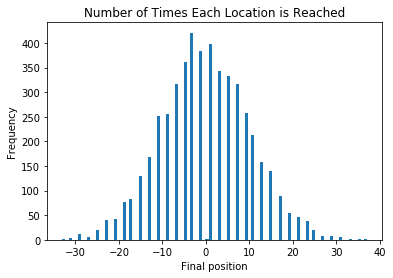

In [7]:
b = randomWalkSim(100,.50,5000)

('k=', 0.75, 'N=', 100, 'SimN=', 5000)


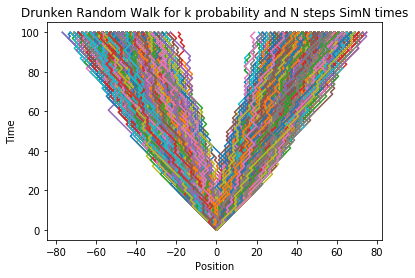

('k=', 0.75, 'N=', 100, 'SimN=', 5000)


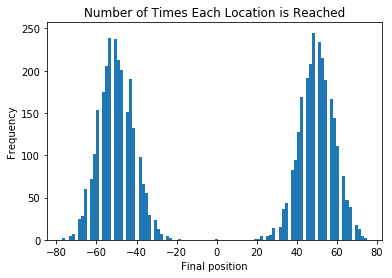

In [8]:
c = randomWalkSim(100,.75,5000)

From this, we calculate the RMS value of each walk and the probability for each drunken person to arrive home safely in N steps [available by request].